In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('test_data.csv', usecols = ['x', 'y','label'])
data.head()

,x,y,label
0,-3.424694,3.856715,1.0
1,-3.670550,4.019227,1.0
2,-3.508982,0.465036,0.0
3,-2.453220,2.227331,1.0
4,-2.156954,2.274100,1.0


<Axes: xlabel='x', ylabel='y'>

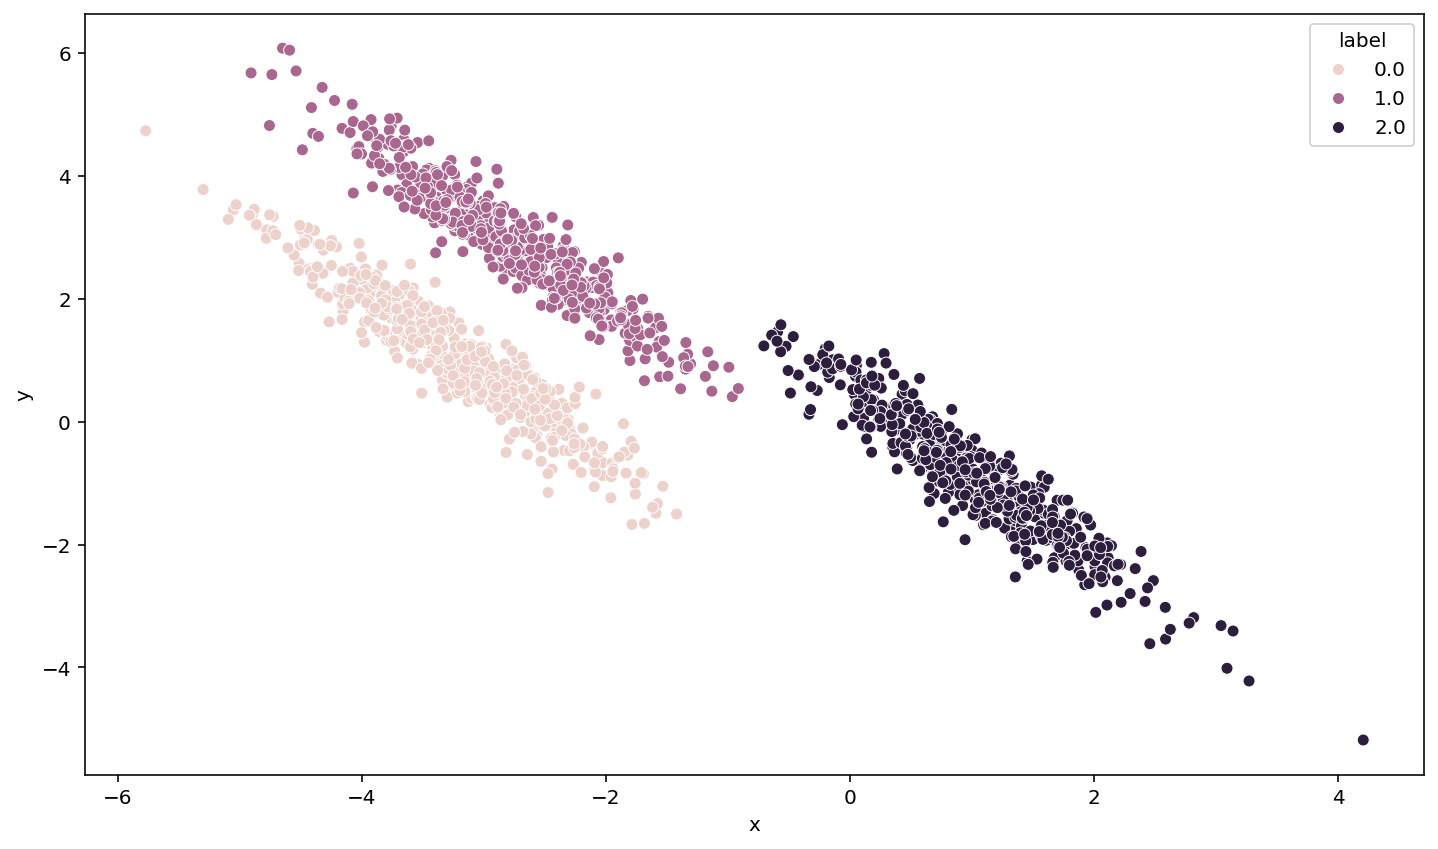

In [3]:
sns.scatterplot(data =data, x = 'x', y = 'y', hue ='label')

In [4]:
def rotate_2d_scipy(points, angle_degrees):
    # Convert 2D points to 3D by adding a z-coordinate of 0
    points_3d = np.column_stack([points,np.zeros(points.shape[0])])
    
    # Create a 3D rotation (around the z-axis) using scipy
    rotation = R.from_euler('z', angle_degrees, degrees=True)
    
    # Apply the rotation to the 3D points
    rotated_points_3d = rotation.apply(points_3d)
    
    # Convert back to 2D by ignoring the z-coordinate
    rotated_points_2d = rotated_points_3d[:, :2]
    
    return rotated_points_2d

points = data.iloc[:,0:2]

          x         y
0 -3.424694  3.856715
1 -3.670550  4.019227
2 -3.508982  0.465036
3 -2.453220  2.227331
4 -2.156954  2.274100


<Axes: xlabel='x', ylabel='y'>

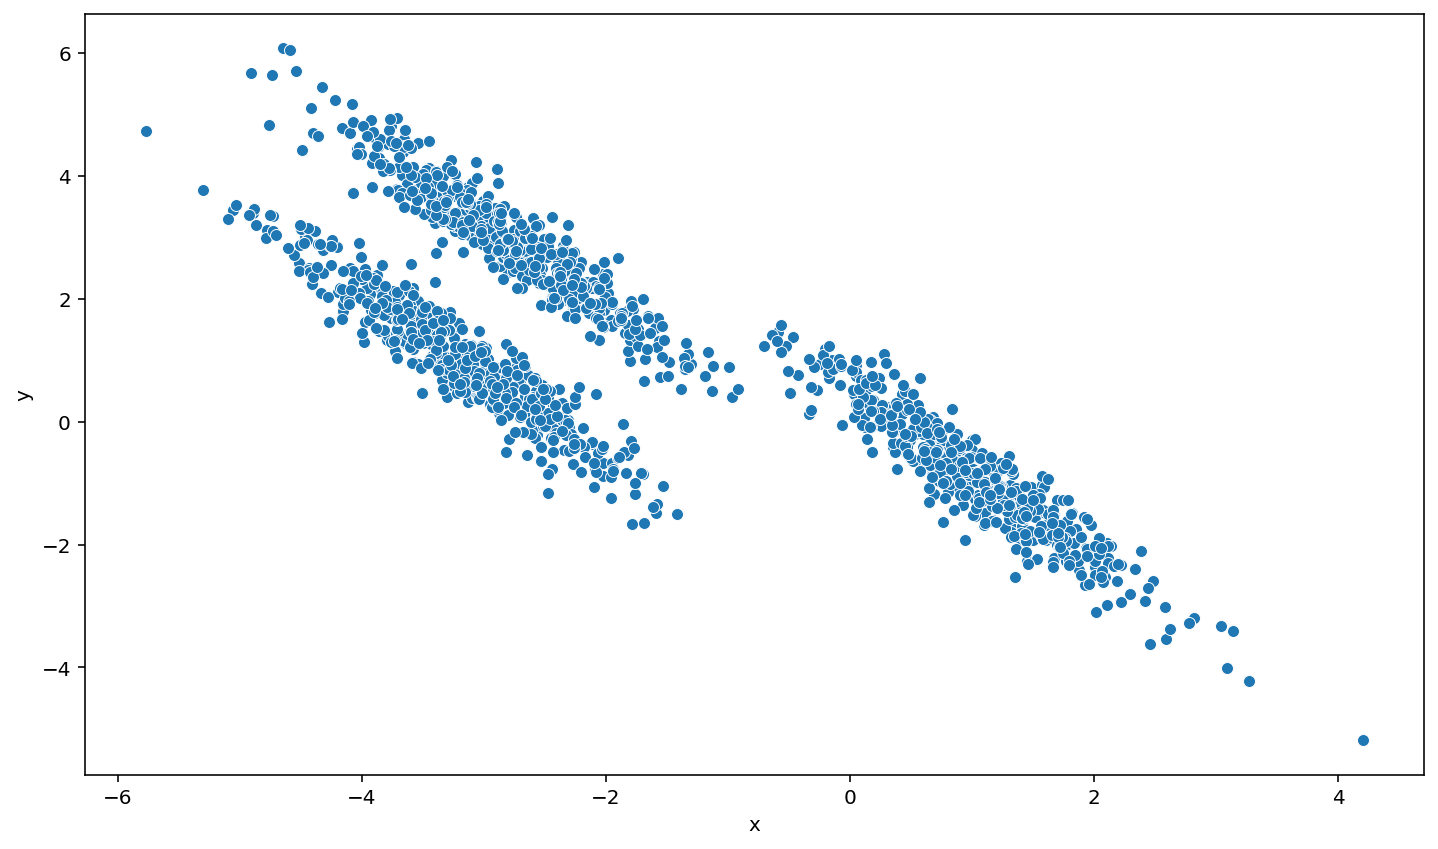

In [5]:
print(points.head())
sns.scatterplot(data =points, x = 'x', y = 'y')

[[-5.12355949 -0.59322468]
 [-5.39769872 -0.70140486]
 [-2.39360488 -2.60765581]
 ...
 [ 2.03132583  0.04141144]
 [-0.97270047  0.06257516]
 [ 1.64018182  0.25130168]]
          X         Y         x         y  label
0 -5.123559 -0.593225 -3.424694  3.856715    1.0
1 -5.397699 -0.701405 -3.670550  4.019227    1.0
2 -2.393605 -2.607656 -3.508982  0.465036    0.0
3 -3.231632 -0.732016 -2.453220  2.227331    1.0
4 -3.100011 -0.462503 -2.156954  2.274100    1.0


<Axes: xlabel='X', ylabel='Y'>

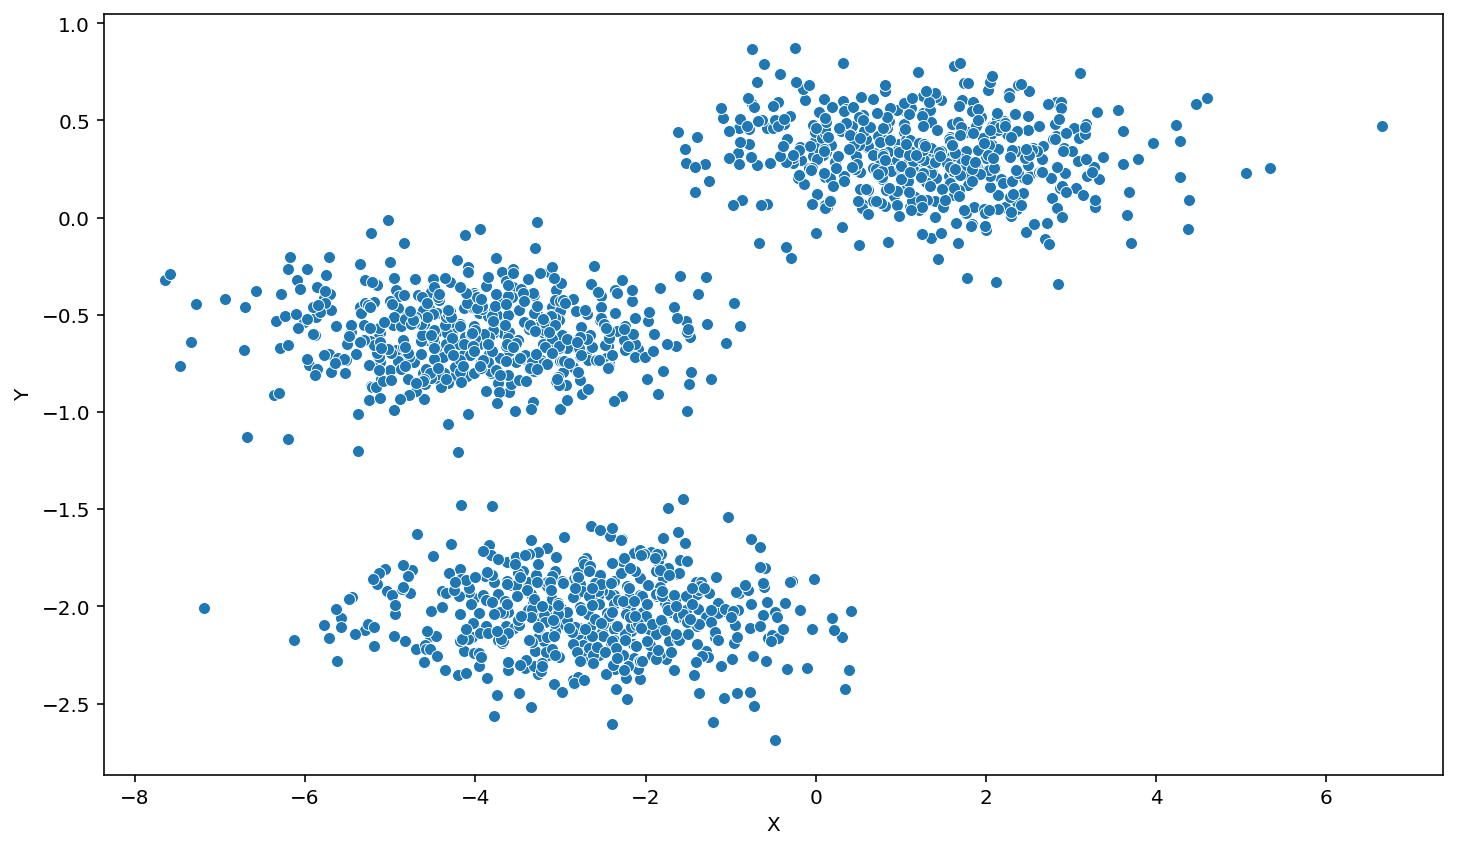

In [6]:
# Rotate the points by 45 degrees using scipy
rotated_points = rotate_2d_scipy(points, 55 )
print(rotated_points)
# Convert the rotated points to a DataFrame
rotated_points_df = pd.DataFrame(rotated_points, columns=['x', 'y'])
rotated_points_df.rename(columns = {'x':'X','y':'Y'}, inplace = True)
rotated_points_df_cat = pd.concat([rotated_points_df,data], axis=1)
print(rotated_points_df_cat.head())
sns.scatterplot(data =rotated_points_df, x = 'X', y = 'Y')

          X         Y
0  0.176447  0.588462
1  0.157283  0.558066
2  0.367291  0.022456
3  0.308707  0.549465
4  0.317908  0.625191


<Axes: xlabel='X', ylabel='Y'>

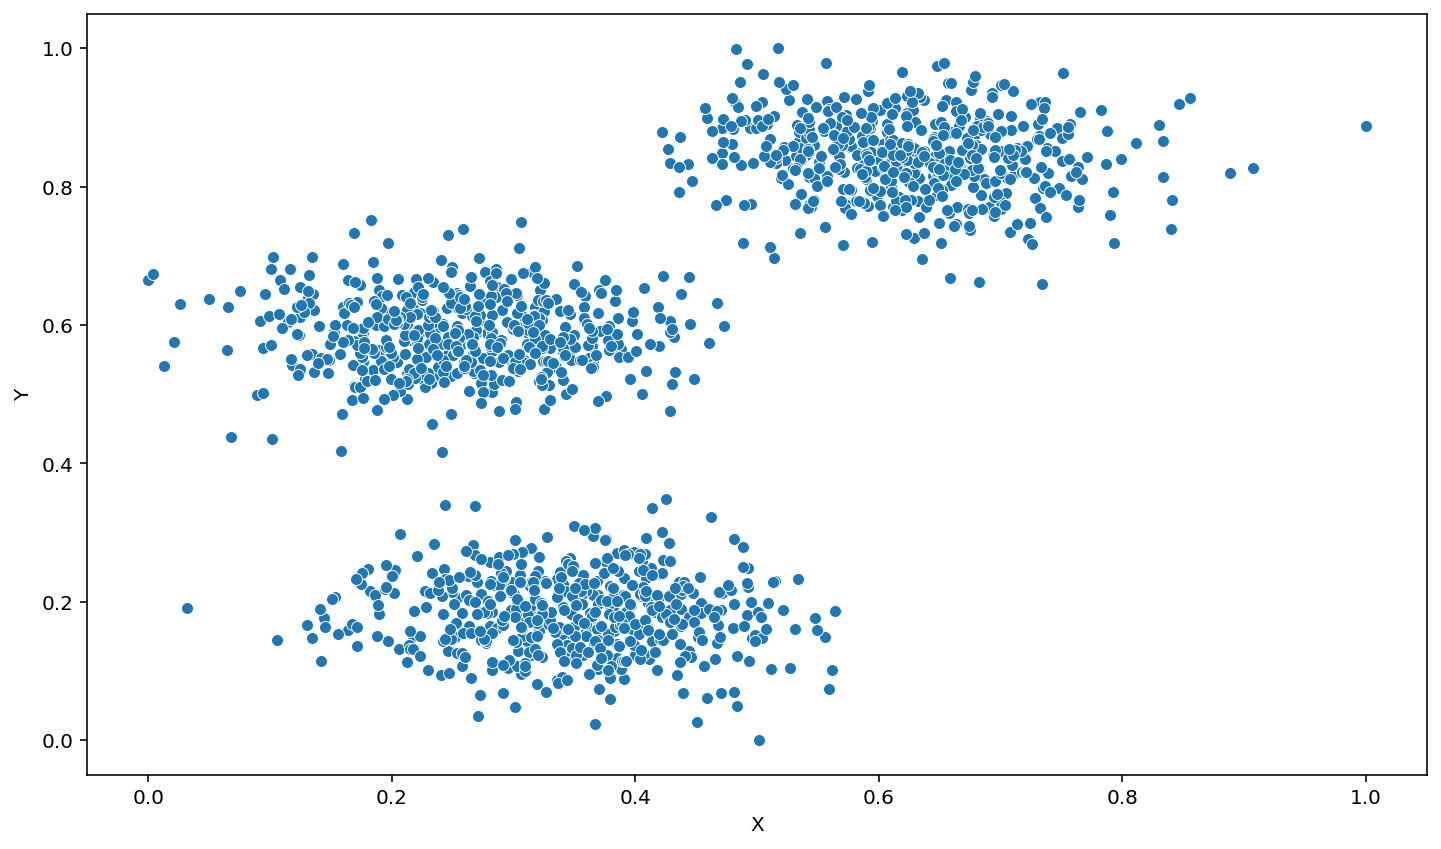

In [7]:
# define standard scaler 
#scaler = StandardScaler()   
# transform data 
#rotated_points_df = scaler.fit_transform(rotated_points_df) 

scaler = preprocessing.MinMaxScaler()
rotated_points_df = scaler.fit_transform(rotated_points_df)
rotated_points_df = pd.DataFrame(rotated_points_df, columns=['X', 'Y'])
print(rotated_points_df.head())
sns.scatterplot(data =rotated_points_df, x = 'X', y = 'Y')

In [8]:
kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(rotated_points_df[['X', 'Y']])
print(kmeans.cluster_centers_)

[[0.62445689 0.84425304]
 [0.25554202 0.58600409]
 [0.34798913 0.18336585]]


<Axes: xlabel='X', ylabel='Y'>

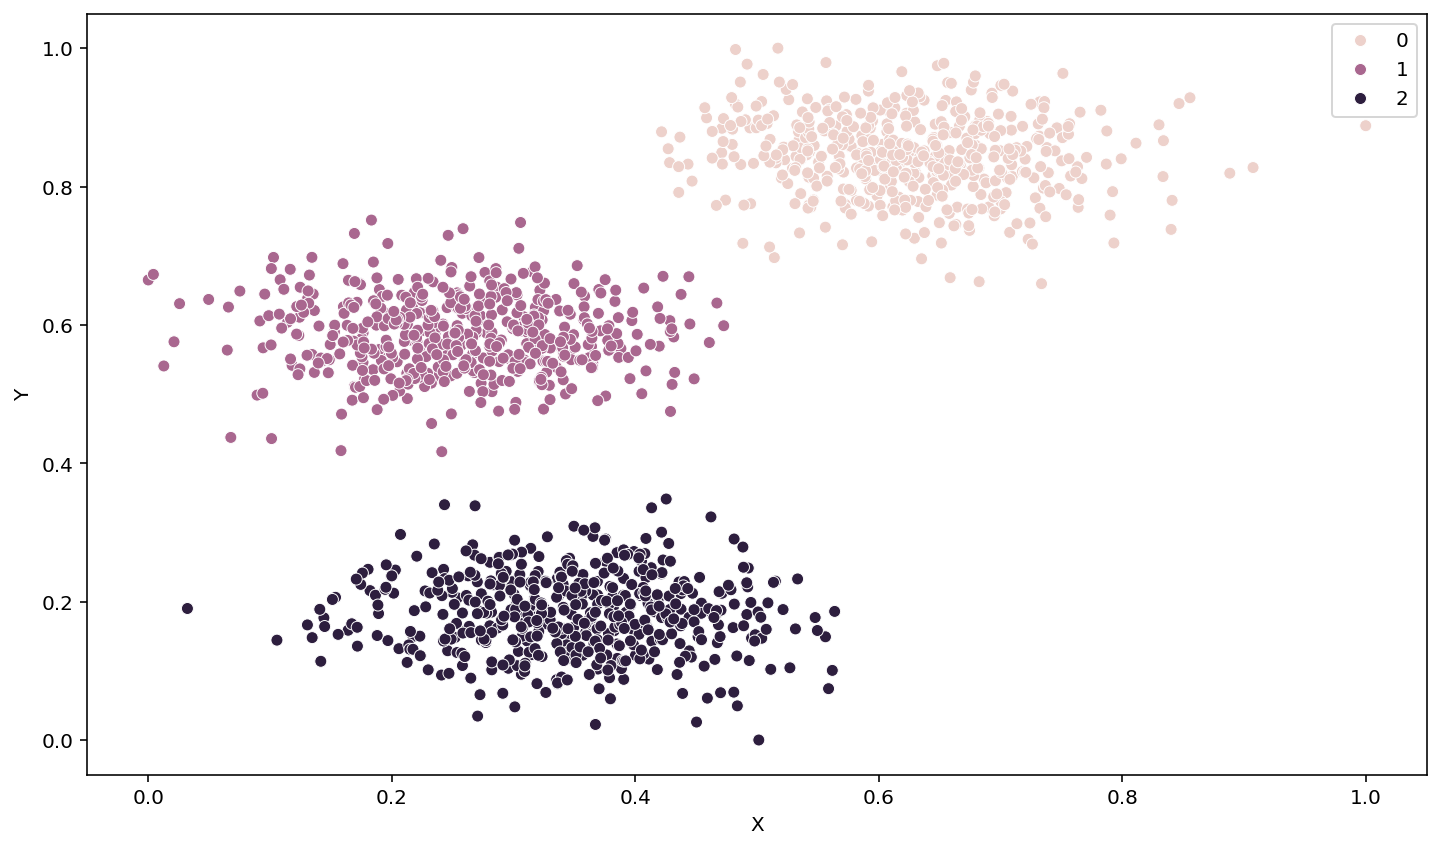

In [9]:
sns.scatterplot(data = rotated_points_df, x = 'X', y = 'Y', hue= kmeans.labels_)